### Packet-Level Higher Layer Database Analysis

In [1]:
import subprocess
import pandas as pd
import sqlite3
import os

protocol_identifier = {
    1: "ICMP",
    6: "TCP",
    17: "UDP",
    47: "GRE",
    50: "ESP",
    51: "AH",
    58: "ICMPv6",
    132: "SCTP"
}

def map_protocols(proto_str):
    try:
        nums = [int(x) for x in str(proto_str).split(',')]
        return ','.join([protocol_identifier.get(n, 'Other') for n in nums])
    except:
        return 'Other'


files = [
    "filteredTCP1.pcap",
    "filteredTCP2.pcap",
    "filteredTCP3.pcap",
    "filteredDDOSTCP1.pcap",
    "filteredDDOSTCP2.pcap",
    "filteredDDOSTCP3.pcap",
    "filteredSYN1.pcap",
    "filteredSYN2.pcap",
    "filteredSYN3.pcap",
    "filteredDDOSSYN1.pcap",
    "filteredDDOSSYN2.pcap",
    "filteredDDOSSYN3.pcap",
    "filteredUDP1.pcap",
    "filteredUDP2.pcap",
    "filteredUDP3.pcap",
    "filteredUDP4.pcap",
    "filteredUDP5.pcap",
    "filteredDDOSUDP1.pcap",
    "filteredDDOSUDP2.pcap",
    "filteredDDOSUDP3.pcap",
    "filteredPortScan1.pcap",
    "filteredPortScan2.pcap",
    "filteredPortScan3.pcap",
    "filteredICMP1.pcap",
    "filteredICMP2.pcap",
    "filteredICMP3.pcap",
    "filteredDDOSICMP1.pcap",
    "filteredDDOSICMP2.pcap",
    "filteredDDOSICMP3.pcap",
    "filteredBenign1.pcap",
    "filteredBenign2.pcap",
    "filteredBenign3.pcap",
    "filteredBenign4.pcap",
    "filteredBenign5.pcap",
    "filteredBenign6.pcap"
]

db_network = 'Network_Data.db'
table_name_network = 'Network_Data'


all_dfs = []

for file in files:
    csv_file = file.replace('.pcap', '.csv')

    print(f" Extracting from {file}...")
    if 'syn' in file.lower():
        traffic_label = 'SYN'
    elif 'tcp' in file.lower():
        traffic_label = 'TCP'
    elif 'udp' in file.lower():
        traffic_label = 'UDP'
    elif 'icmp' in file.lower():
        traffic_label = 'ICMP'
    elif 'portscan' in file.lower():
        traffic_label = 'PortScan'
    elif 'benign' in file.lower():
        traffic_label = 'Benign'
    else:
        traffic_label = 'Unknown'
    
    if 'benign' in file.lower():
        traffic_type = 'Benign'
    else:
        traffic_type = 'Attack'
        
    subprocess.run([
    "tshark",
    "-r", file,
    "-Y", "ip.addr == 192.168.0.10",
    "-T", "fields",
    "-e", "frame.time",
    "-e", "frame.len",
    "-e", "frame.protocols",
    "-e", "ip.src",
    "-e", "ip.dst",
    "-e", "ip.proto",
    "-e", "ip.ttl",
    "-e", "ip.len",
    "-e", "ip.id",
    "-e", "ip.flags",
    "-e", "tcp.srcport",
    "-e", "tcp.dstport",
    "-e", "tcp.flags",
    "-e", "tcp.seq",
    "-e", "tcp.ack",
    "-e", "tcp.len",
    "-e", "tcp.window_size_value",
    "-e", "tcp.stream",
    "-e", "udp.srcport",
    "-e", "udp.dstport",
    "-e", "udp.length",
    "-e", "icmp.type",
    "-e", "icmp.code",
    "-E", "header=y",
    "-E", "separator=,", 
    "-E", "quote=d"
], stdout=open(csv_file, 'w'))

   
    df = pd.read_csv(csv_file, low_memory=False)
    
    if 'ip.proto' in df.columns:
        df['ip.proto'] = df['ip.proto'].apply(map_protocols)

    all_dfs.append(df)


final_df = pd.concat(all_dfs, ignore_index=True)

conn = sqlite3.connect(db_network)
final_df.to_sql(table_name_network, conn, if_exists='replace', index=False)

conn.commit()
conn.close()


 Extracting from filteredTCP1.pcap...
 Extracting from filteredTCP2.pcap...
 Extracting from filteredTCP3.pcap...
 Extracting from filteredDDOSTCP1.pcap...
 Extracting from filteredDDOSTCP2.pcap...
 Extracting from filteredDDOSTCP3.pcap...
 Extracting from filteredSYN1.pcap...
 Extracting from filteredSYN2.pcap...
 Extracting from filteredSYN3.pcap...
 Extracting from filteredDDOSSYN1.pcap...
 Extracting from filteredDDOSSYN2.pcap...
 Extracting from filteredDDOSSYN3.pcap...
 Extracting from filteredUDP1.pcap...
 Extracting from filteredUDP2.pcap...
 Extracting from filteredUDP3.pcap...
 Extracting from filteredUDP4.pcap...
 Extracting from filteredUDP5.pcap...
 Extracting from filteredDDOSUDP1.pcap...
 Extracting from filteredDDOSUDP2.pcap...
 Extracting from filteredDDOSUDP3.pcap...
 Extracting from filteredPortScan1.pcap...
 Extracting from filteredPortScan2.pcap...
 Extracting from filteredPortScan3.pcap...
 Extracting from filteredICMP1.pcap...
 Extracting from filteredICMP2.pcap.

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('Network_Data.db')
df = pd.read_sql_query("SELECT * FROM Network_Data LIMIT 30000", conn)
print(df)

                                frame.time  frame.len  \
0      Mar  6, 2025 14:37:50.545026086 GMT        100   
1      Mar  6, 2025 14:37:50.545126926 GMT        100   
2      Mar  6, 2025 14:37:51.569020590 GMT        100   
3      Mar  6, 2025 14:37:51.569167266 GMT        100   
4      Mar  6, 2025 14:37:52.593024292 GMT        100   
...                                    ...        ...   
29995  Mar  6, 2025 14:39:43.945319846 GMT         76   
29996  Mar  6, 2025 14:39:43.945328632 GMT         76   
29997  Mar  6, 2025 14:39:43.945426556 GMT         62   
29998  Mar  6, 2025 14:39:43.945433890 GMT         56   
29999  Mar  6, 2025 14:39:43.945436995 GMT         56   

                          frame.protocols        ip.src        ip.dst  \
0              sll:ethertype:ip:icmp:data   192.168.0.1  192.168.0.10   
1              sll:ethertype:ip:icmp:data  192.168.0.10   192.168.0.1   
2              sll:ethertype:ip:icmp:data   192.168.0.1  192.168.0.10   
3              sll:ethe

In [3]:
count_df = pd.read_sql_query("SELECT COUNT(*) as total FROM Network_Data", conn)
print(count_df)
conn.close()

      total
0  28803972


In [4]:
conn = sqlite3.connect('Network_Data.db')

df = pd.read_sql_query("SELECT * FROM Network_Data", conn)

conn.close()

df.head()

,frame.time,frame.len,frame.protocols,ip.src,ip.dst,ip.proto,ip.ttl,ip.len,ip.id,ip.flags,...,tcp.seq,tcp.ack,tcp.len,tcp.window_size_value,tcp.stream,udp.srcport,udp.dstport,udp.length,icmp.type,icmp.code
0,"Mar 6, 2025 14:37:50.545026086 GMT",100,sll:ethertype:ip:icmp:data,192.168.0.1,192.168.0.10,ICMP,64,84,0x00006038,0x00004000,...,NaN,NaN,NaN,NaN,NaN,None,None,None,8.0,0.0
1,"Mar 6, 2025 14:37:50.545126926 GMT",100,sll:ethertype:ip:icmp:data,192.168.0.10,192.168.0.1,ICMP,64,84,0x00003dda,0x00000000,...,NaN,NaN,NaN,NaN,NaN,None,None,None,0.0,0.0
2,"Mar 6, 2025 14:37:51.569020590 GMT",100,sll:ethertype:ip:icmp:data,192.168.0.1,192.168.0.10,ICMP,64,84,0x000060c3,0x00004000,...,NaN,NaN,NaN,NaN,NaN,None,None,None,8.0,0.0
3,"Mar 6, 2025 14:37:51.569167266 GMT",100,sll:ethertype:ip:icmp:data,192.168.0.10,192.168.0.1,ICMP,64,84,0x00003e02,0x00000000,...,NaN,NaN,NaN,NaN,NaN,None,None,None,0.0,0.0
4,"Mar 6, 2025 14:37:52.593024292 GMT",100,sll:ethertype:ip:icmp:data,192.168.0.1,192.168.0.10,ICMP,64,84,0x00006295,0x00004000,...,NaN,NaN,NaN,NaN,NaN,None,None,None,8.0,0.0


In [5]:
df.nunique()

frame.time               26153465
frame.len                     286
frame.protocols                85
ip.src                         22
ip.dst                         16
ip.proto                       10
ip.ttl                         90
ip.len                        361
ip.id                     9424585
ip.flags                        9
tcp.srcport                 62704
tcp.dstport                 12526
tcp.flags                       8
tcp.seq                    403966
tcp.ack                     29758
tcp.len                       155
tcp.window_size_value        2130
tcp.stream                  32773
udp.srcport                    39
udp.dstport                  2018
udp.length                    259
icmp.type                      10
icmp.code                       5
dtype: int64

*** Using Zeek Tool to create Flows

In [1]:
import subprocess
import pandas as pd
import sqlite3
import os


files = [
    "filteredTCP1flow.csv",
    "filteredTCP2flow.csv",
    "filteredTCP3flow.csv",
    "filteredDDOSTCP1flow.csv",
    "filteredDDOSTCP2flow.csv",
    "filteredDDOSTCP3flow.csv",
    "filteredSYN1flow.csv",
    "filteredSYN2flow.csv",
    "filteredSYN3flow.csv",
    "filteredDDOSSYN1flow.csv",
    "filteredDDOSSYN2flow.csv",
    "filteredDDOSSYN3flow.csv",
    "filteredUDP1flow.csv",
    "filteredUDP2flow.csv",
    "filteredUDP3flow.csv",
    "filteredUDP4flow.csv",
    "filteredUDP5flow.csv",
    "filteredDDOSUDP1flow.csv",
    "filteredDDOSUDP2flow.csv",
    "filteredDDOSUDP3flow.csv",
    "filteredPortScan1flow.csv",
    "filteredPortScan2flow.csv",
    "filteredPortScan3flow.csv",
    "filteredICMP1flow.csv",
    "filteredICMP2flow.csv",
    "filteredICMP3flow.csv",
    "filteredDDOSICMP1flow.csv",
    "filteredDDOSICMP2flow.csv",
    "filteredDDOSICMP3flow.csv",
    "filteredBenign1flow.csv",
    "filteredBenign2flow.csv",
    "filteredBenign3flow.csv",
    "filteredBenign4flow.csv",
    "filteredBenign5flow.csv",
    "filteredBenign6flow.csv"
]

all_flows = []

for file in files:
    df = pd.read_csv(file)

    if "SYN" in file:
        traffic_label = "SYN"
    elif "TCP" in file:
        traffic_label = "TCP"
    elif "UDP" in file:
        traffic_label = "UDP"
    elif "ICMP" in file:
        traffic_label = "ICMP"
    elif "PortScan" in file:
        traffic_label = "PortScan"
    elif "Benign" in file:
        traffic_label = "Benign"
    else:
        traffic_label = "Unknown"

    df["traffic_label"] = traffic_label

    
    traffic_type = "Benign" if "Benign" in file else "Attack"
    df["traffic_type"] = traffic_type
    
    all_flows.append(df)

if all_flows:
    combined_df = pd.concat(all_flows, ignore_index=True)
    conn = sqlite3.connect("5G-NL-IDD-Higher_Layer_Network_Data.db")
    combined_df.to_sql("Higher_Level_Data", conn, if_exists="replace", index=False)
    conn.close()



In [4]:
conn = sqlite3.connect('Higher_Level_Data.db')
df = pd.read_sql_query("SELECT * FROM Higher_Level_Data LIMIT 30000", conn)
print(df)

             src_ip        dst_ip proto service  duration orig_bytes  \
0       192.168.0.1  192.168.0.10   tcp       -  0.000161          0   
1      172.31.0.134  192.168.0.10   tcp       -  0.000187          0   
2       192.168.0.1  192.168.0.10   tcp       -  0.000148          0   
3      172.31.0.134  192.168.0.10   tcp       -  0.000177          0   
4       192.168.0.1  192.168.0.10   tcp       -  0.000174          0   
...             ...           ...   ...     ...       ...        ...   
29995  172.31.0.134  192.168.0.10   tcp       -  0.000149          0   
29996   192.168.0.1  192.168.0.10   tcp       -  0.000069          0   
29997  172.31.0.134  192.168.0.10   tcp       -  0.000086          0   
29998   192.168.0.1  192.168.0.10   tcp       -  0.000052          0   
29999  172.31.0.134  192.168.0.10   tcp       -  0.000063          0   

      resp_bytes conn_state  orig_pkts  resp_pkts  orig_ip_bytes  \
0              0        REJ          1          1             60   

In [3]:
count_df = pd.read_sql_query("SELECT COUNT(*) as total FROM Higher_Level_Data", conn)
print(count_df)
conn.close()

    total
0  204775


Pre-processing

In [1]:
import sqlite3
import pandas as pd

In [4]:
conn = sqlite3.connect('Higher_Level_Data.db')

df = pd.read_sql_query("SELECT * FROM Higher_Level_Data", conn)

conn.close()

df.head()

,src_ip,dst_ip,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label,traffic_type
0,192.168.0.1,192.168.0.10,tcp,-,0.000161,0,0,REJ,1,1,60,40,Sr,TCP,Attack
1,172.31.0.134,192.168.0.10,tcp,-,0.000187,0,0,REJ,2,2,120,80,Sr,TCP,Attack
2,192.168.0.1,192.168.0.10,tcp,-,0.000148,0,0,REJ,1,1,60,40,Sr,TCP,Attack
3,172.31.0.134,192.168.0.10,tcp,-,0.000177,0,0,REJ,2,2,120,80,Sr,TCP,Attack
4,192.168.0.1,192.168.0.10,tcp,-,0.000174,0,0,REJ,1,1,60,40,Sr,TCP,Attack


In [3]:
df['traffic_type'] = df['traffic_type'].map({'Benign': 0, 'Attack': 1})

In [4]:
df['traffic_type'].value_counts(normalize=True)

traffic_type
1    0.999551
0    0.000449
Name: proportion, dtype: float64

In [5]:
print(df['traffic_type'].value_counts())

traffic_type
1    204683
0        92
Name: count, dtype: int64


In [6]:
df[df['traffic_type'] == 0]

,src_ip,dst_ip,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label,traffic_type
204683,172.31.0.1,172.31.0.134,udp,-,-,-,-,OTH,0,0,0,0,CccCcC,Benign,0
204684,172.31.0.134,172.31.0.1,udp,-,-,-,-,OTH,0,0,0,0,CCccCc,Benign,0
204685,172.31.0.134,172.31.0.1,udp,-,-,-,-,OTH,0,0,0,0,CcCc,Benign,0
204686,192.168.0.1,192.168.0.10,tcp,-,121.160553,36,18276,OTH,63,63,3312,21552,DdA,Benign,0
204687,192.168.0.1,192.168.0.10,tcp,-,122.573871,36,31788,OTH,271,457,14308,57044,DdAtt,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204770,192.168.0.1,192.168.0.10,tcp,-,279.927907,1064,37588,OTH,212,188,12100,47648,DdAta,Benign,0
204771,172.31.0.134,192.168.0.10,tcp,-,279.927902,1064,37588,OTH,424,376,24200,95296,DTdtAtTat,Benign,0
204772,192.168.0.1,192.168.0.10,tcp,-,299.143099,516,51524,OTH,384,665,20616,86856,DdAtt,Benign,0
204773,172.31.0.134,192.168.0.10,udp,-,6.048170,7303720,8,SF,5046,2,7445008,64,Dd,Benign,0


In [7]:
df = df.drop('src_ip', axis=1)
df = df.drop('dst_ip', axis=1)
df = df.drop('traffic_label', axis=1)

df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,tcp,-,0.000161,0,0,REJ,1,1,60,40,Sr,1
1,tcp,-,0.000187,0,0,REJ,2,2,120,80,Sr,1
2,tcp,-,0.000148,0,0,REJ,1,1,60,40,Sr,1
3,tcp,-,0.000177,0,0,REJ,2,2,120,80,Sr,1
4,tcp,-,0.000174,0,0,REJ,1,1,60,40,Sr,1


In [8]:
df['proto'] = df['proto'].astype('category').cat.codes
df['service'] = df['service'].astype('category').cat.codes
df['conn_state'] = df['conn_state'].astype('category').cat.codes
df['history'] = df['history'].astype('category').cat.codes

df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,1,0,0.000161,0,0,1,1,1,60,40,73,1
1,1,0,0.000187,0,0,1,2,2,120,80,73,1
2,1,0,0.000148,0,0,1,1,1,60,40,73,1
3,1,0,0.000177,0,0,1,2,2,120,80,73,1
4,1,0,0.000174,0,0,1,1,1,60,40,73,1


In [9]:
df.isnull().sum

<bound method DataFrame.sum of         proto  service  duration  orig_bytes  resp_bytes  conn_state  \
0       False    False     False       False       False       False   
1       False    False     False       False       False       False   
2       False    False     False       False       False       False   
3       False    False     False       False       False       False   
4       False    False     False       False       False       False   
...       ...      ...       ...         ...         ...         ...   
204770  False    False     False       False       False       False   
204771  False    False     False       False       False       False   
204772  False    False     False       False       False       False   
204773  False    False     False       False       False       False   
204774  False    False     False       False       False       False   

        orig_pkts  resp_pkts  orig_ip_bytes  resp_ip_bytes  history  \
0           False      False     

In [10]:
df.nunique()

proto              3
service            9
duration         826
orig_bytes       102
resp_bytes        51
conn_state         9
orig_pkts        185
resp_pkts        170
orig_ip_bytes    284
resp_ip_bytes    199
history           78
traffic_type       2
dtype: int64

In [11]:
df.dtypes

proto              int8
service            int8
duration         object
orig_bytes       object
resp_bytes       object
conn_state         int8
orig_pkts         int64
resp_pkts         int64
orig_ip_bytes     int64
resp_ip_bytes     int64
history            int8
traffic_type      int64
dtype: object

In [12]:
print(df.describe())

               proto        service     conn_state      orig_pkts  \
count  204775.000000  204775.000000  204775.000000  204775.000000   
mean        1.058699       0.001719       1.235204      30.138723   
std         0.236035       0.092164       0.944254    2751.039196   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       1.000000       2.000000   
75%         1.000000       0.000000       1.000000       6.000000   
max         2.000000       8.000000       8.000000  809071.000000   

           resp_pkts  orig_ip_bytes  resp_ip_bytes        history  \
count  204775.000000   2.047750e+05   2.047750e+05  204775.000000   
mean       17.354286   1.706296e+04   1.134143e+04      70.705814   
std      2386.435695   1.854953e+06   1.581129e+06       9.150670   
min         0.000000   0.000000e+00   0.000000e+00       0.000000   
25%         1.000000   6.000000e+

In [13]:
findObject = df[df['duration'] == '-']

print(findObject)

        proto  service duration orig_bytes resp_bytes  conn_state  orig_pkts  \
3086        2        0        -          -          -           0          0   
6457        2        0        -          -          -           0          0   
12123       2        0        -          -          -           0          0   
18798       2        0        -          -          -           0          0   
28317       2        0        -          -          -           0          0   
...       ...      ...      ...        ...        ...         ...        ...   
204733      2        0        -          -          -           0          0   
204746      2        0        -          -          -           0          0   
204754      2        0        -          -          -           0          0   
204759      2        0        -          -          -           0          0   
204760      2        0        -          -          -           0          0   

        resp_pkts  orig_ip_bytes  resp_

In [14]:
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').fillna(0)
df['orig_bytes'] = pd.to_numeric(df['orig_bytes'], errors='coerce').fillna(0)
df['resp_bytes'] = pd.to_numeric(df['resp_bytes'], errors='coerce').fillna(0)
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,1,0,0.000161,0.0,0.0,1,1,1,60,40,73,1
1,1,0,0.000187,0.0,0.0,1,2,2,120,80,73,1
2,1,0,0.000148,0.0,0.0,1,1,1,60,40,73,1
3,1,0,0.000177,0.0,0.0,1,2,2,120,80,73,1
4,1,0,0.000174,0.0,0.0,1,1,1,60,40,73,1


In [15]:
df.to_csv('cleaned_network_flows.csv', index=False)

In [16]:
import pandas as pd
df = pd.read_csv('cleaned_network_flows.csv')

df.head()


,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,1,0,0.000161,0.0,0.0,1,1,1,60,40,73,1
1,1,0,0.000187,0.0,0.0,1,2,2,120,80,73,1
2,1,0,0.000148,0.0,0.0,1,1,1,60,40,73,1
3,1,0,0.000177,0.0,0.0,1,2,2,120,80,73,1
4,1,0,0.000174,0.0,0.0,1,1,1,60,40,73,1


In [17]:
from imblearn.over_sampling import SMOTE

X_SMOTE = df.drop(columns=['traffic_type'])  
y_SMOTE = df['traffic_type']                 

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_SMOTE, y_SMOTE)


X_resampled_df = pd.DataFrame(X_resampled, columns=X_SMOTE.columns)
y_resampled_df = pd.Series(y_resampled, name='traffic_type')


resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

/home/alan/.local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [19]:
print(resampled_df['traffic_type'].value_counts())

traffic_type
1    204683
0    204683
Name: count, dtype: int64


In [20]:
resampled_df['traffic_type'].value_counts(normalize=True)

traffic_type
1    0.5
0    0.5
Name: proportion, dtype: float64

Pearson's Correlation

/home/alan/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


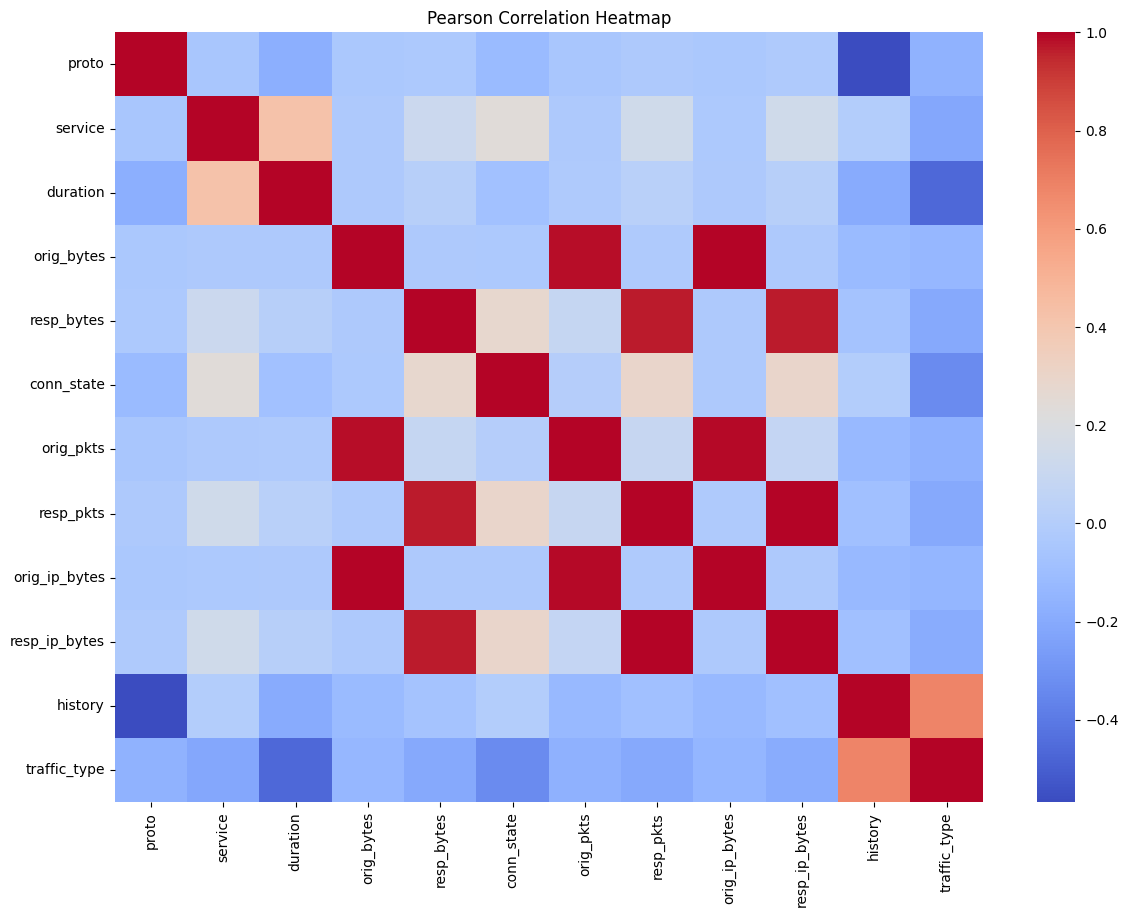

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = resampled_df.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [22]:
print(corr_matrix)


                  proto   service  duration  orig_bytes  resp_bytes  \
proto          1.000000 -0.047876 -0.177826   -0.037428   -0.030364   
service       -0.047876  1.000000  0.424128   -0.028191    0.113866   
duration      -0.177826  0.424128  1.000000   -0.023905    0.015527   
orig_bytes    -0.037428 -0.028191 -0.023905    1.000000   -0.026629   
resp_bytes    -0.030364  0.113866  0.015527   -0.026629    1.000000   
conn_state    -0.115672  0.238786 -0.082248   -0.029526    0.282789   
orig_pkts     -0.048067 -0.024516 -0.018929    0.985999    0.082142   
resp_pkts     -0.024165  0.139111  0.022168   -0.020566    0.968622   
orig_ip_bytes -0.040418 -0.029814 -0.026358    0.998556   -0.024473   
resp_ip_bytes -0.019792  0.139812  0.020033   -0.025315    0.969049   
history       -0.567643  0.000193 -0.199775   -0.118759   -0.069757   
traffic_type  -0.160138 -0.212521 -0.468831   -0.132950   -0.200895   

               conn_state  orig_pkts  resp_pkts  orig_ip_bytes  resp_ip_byte

In [23]:
target_corr = corr_matrix['traffic_type'].drop('traffic_type').sort_values(ascending=False)
print(target_corr)

history          0.686806
orig_bytes      -0.132950
orig_ip_bytes   -0.142309
proto           -0.160138
orig_pkts       -0.165499
resp_ip_bytes   -0.192903
resp_bytes      -0.200895
resp_pkts       -0.203549
service         -0.212521
conn_state      -0.331161
duration        -0.468831
Name: traffic_type, dtype: float64


ANOVA F-Score

In [24]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X_resampled, y_resampled)

anova_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

print(anova_df)

          Feature        F-score  p-value
10        history  365509.323832      0.0
2        duration  115329.071819      0.0
5      conn_state   50423.743323      0.0
1         service   19363.599608      0.0
7       resp_pkts   17693.932998      0.0
4      resp_bytes   17216.256761      0.0
9   resp_ip_bytes   15821.787439      0.0
6       orig_pkts   11528.173606      0.0
0           proto   10774.066627      0.0
8   orig_ip_bytes    8461.770871      0.0
3      orig_bytes    7366.037721      0.0


Feature Selection (Filter method)

In [25]:
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, random_state=1)

In [26]:
from sklearn.feature_selection import mutual_info_classif

i_scores = mutual_info_classif(X_train_resampled,y_train_resampled)


features_info_gain = pd.DataFrame(i_scores,index = X_train_resampled.columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'],ascending=False,inplace=True)
print(features_info_gain)

                 I-Gain
history        0.680761
orig_ip_bytes  0.680705
duration       0.615166
resp_ip_bytes  0.612001
conn_state     0.596525
orig_pkts      0.553828
resp_pkts      0.486762
orig_bytes     0.383254
resp_bytes     0.332993
proto          0.074487
service        0.045035


In [27]:
resampled_df = resampled_df.drop('orig_bytes', axis=1)
resampled_df = resampled_df.drop('resp_bytes', axis=1)

In [28]:
resampled_df = resampled_df.drop('service', axis=1)

In [29]:
resampled_df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,1,0.000161,1,1,1,60,40,73,1
1,1,0.000187,1,2,2,120,80,73,1
2,1,0.000148,1,1,1,60,40,73,1
3,1,0.000177,1,2,2,120,80,73,1
4,1,0.000174,1,1,1,60,40,73,1


In [31]:
resampled_df.to_csv('after_analysis_network_flows.csv', index=False)

Machine Learning models

In [1]:
import pandas as pd
df = pd.read_csv('after_analysis_network_flows.csv')

df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_type
0,1,0.000161,1,1,1,60,40,73,1
1,1,0.000187,1,2,2,120,80,73,1
2,1,0.000148,1,1,1,60,40,73,1
3,1,0.000177,1,2,2,120,80,73,1
4,1,0.000174,1,1,1,60,40,73,1


In [2]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['traffic_type']) 
y = df['traffic_type'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history
0,-0.311445,-0.469066,-0.433021,-0.167162,-0.203924,-0.142860,-0.192978,0.806823
1,-0.311445,-0.469065,-0.433021,-0.167098,-0.203890,-0.142857,-0.192977,0.806823
2,-0.311445,-0.469066,-0.433021,-0.167162,-0.203924,-0.142860,-0.192978,0.806823
3,-0.311445,-0.469065,-0.433021,-0.167098,-0.203890,-0.142857,-0.192977,0.806823
4,-0.311445,-0.469065,-0.433021,-0.167162,-0.203924,-0.142860,-0.192978,0.806823


Decision Tree

In [8]:
import time
import joblib
import os
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()

    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for depth in [2, 5, 7, 10]:
    print(f"\n Max Depth = {depth}")
    for samples_in_leaf in [2, 3, 5, 10]:
        print(f"\nMin Samples Leaf = {samples_in_leaf}")
        
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf)

        def train_model():
            dtc.fit(X_train, y_train)
            
        train_start = time.time()
        mem_train = memory_usage(train_model, interval=0.01)
        train_end_time = time.time()
        train_time = train_end_time - train_start

        def predict_model():
            y_pred = dtc.predict(X_test)
            df_stats = compute_performance_stats(y_test, y_pred)
            
            print("\nPerformance Stats:")
            print(df_stats)

            
        test_start = time.time()
        mem_test = memory_usage(predict_model, interval=0.01)
        test_end_time = time.time()
        test_time = test_end_time - test_start

        stop_event.set()
        cpu_monitor_thread.join()

        model_filename = 'dt_default.joblib'
        joblib.dump(dtc, model_filename)
        model_size_kb = os.path.getsize(model_filename) / 1024  # KB
        model_size_mb = model_size_kb / 1024  #MB
        os.remove(model_filename)

        overall_time = train_time + test_time

        avg_cpu = np.mean(cpu_samples)
    
        cpu_effort = avg_cpu * overall_time
        avg_mem = np.mean(mem_train + mem_test)

        print("\nTiming Metrics")
        print(f"Training Time: {train_time:.2f}s")
        print(f"Inference Time: {test_time:.2f}s")
        print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

        print("\n")
        print(f"Average CPU: {avg_cpu:.2f}%")
        print(f"CPU Effort: {cpu_effort:.2f} % seconds")
        print(f"Avg Memory Usage: {avg_mem:.2f} MB")
        print(f"Model Size (serialized): {model_size_mb:.4f} MB")


stop_event.set()
cpu_monitor_thread.join()
    


 Max Depth = 2

Min Samples Leaf = 2

Performance Stats:
              precision  recall  f1-score     support       TP       TN  \
0                0.9452  1.0000    0.9718   51148.000  51147.0  48228.0   
1                1.0000  0.9421    0.9702   51194.000  48228.0  51147.0   
accuracy         0.9710  0.9710    0.9710       0.971      NaN      NaN   
macro avg        0.9726  0.9710    0.9710  102342.000      NaN      NaN   
weighted avg     0.9726  0.9710    0.9710  102342.000      NaN      NaN   

                  FP      FN  ACCURACY  
0             2966.0     1.0  0.971009  
1                1.0  2966.0  0.971009  
accuracy         NaN     NaN       NaN  
macro avg        NaN     NaN       NaN  
weighted avg     NaN     NaN       NaN  

Timing Metrics
Training Time: 0.41s
Inference Time: 0.14s
Overall Time (Train + Inference): 0.55 seconds


Average CPU: 4.60%
CPU Effort: 2.52 % seconds
Avg Memory Usage: 329.05 MB
Model Size (serialized): 0.0022 MB

Min Samples Leaf = 3

Perfo

KNN

In [5]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [2, 5, 10, 12, 15, 30]:
    print('\nn_neighbors = ', n)
    knn_clf = KNeighborsClassifier(n_neighbors=n) 
    
    def train_model():
        knn_clf.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start

    def predict_model():
        y_pred = knn_clf.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} %seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()
    


n_neighbors =  2

Performance Stats:
              precision  recall  f1-score      support       TP       TN   FP  \
0                0.9998  1.0000    0.9999   51148.0000  51148.0  51186.0  8.0   
1                1.0000  0.9998    0.9999   51194.0000  51186.0  51148.0  0.0   
accuracy         0.9999  0.9999    0.9999       0.9999      NaN      NaN  NaN   
macro avg        0.9999  0.9999    0.9999  102342.0000      NaN      NaN  NaN   
weighted avg     0.9999  0.9999    0.9999  102342.0000      NaN      NaN  NaN   

               FN  ACCURACY  
0             0.0  0.999922  
1             8.0  0.999922  
accuracy      NaN       NaN  
macro avg     NaN       NaN  
weighted avg  NaN       NaN  

Timing Metrics
Training Time: 0.79s
Inference Time: 12.61s
Overall Time (Train + Inference): 13.40 seconds


Average CPU: 4.33%
CPU Effort: 58.01 %seconds
Avg Memory Usage: 346.81 MB

n_neighbors =  5

Performance Stats:
              precision  recall  f1-score      support       TP       TN 

Random Forest

In [12]:
import time
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

global rf_model
rf_model = RandomForestClassifier()
    
def train_model():
    rf_model.fit(X_train_scaled, y_train)
        
train_start = time.time()
mem_train = memory_usage(train_model, interval=0.01)
train_end_time = time.time()
train_time = train_end_time - train_start

def predict_model():
    y_pred = rf_model.predict(X_test_scaled)
    df_stats = compute_performance_stats(y_test, y_pred)
            
    print("\nPerformance Stats:")
    print(df_stats)

            
test_start = time.time()
mem_test = memory_usage(predict_model, interval=0.01)
test_end_time = time.time()
test_time = test_end_time - test_start

stop_event.set()
cpu_monitor_thread.join()

overall_time = train_time + test_time

model_filename = 'dt_default.joblib'
joblib.dump(rf_model, model_filename)
model_size_kb = os.path.getsize(model_filename) / 1024  # KB
model_size_mb = model_size_kb / 1024  #MB
os.remove(model_filename)

avg_cpu = np.mean(cpu_samples)
    
cpu_effort = avg_cpu * overall_time
avg_mem = np.mean(mem_train + mem_test)

print("\nTiming Metrics")
print(f"Training Time: {train_time:.2f}s")
print(f"Inference Time: {test_time:.2f}s")
print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

print("\n")
print(f"Average CPU: {avg_cpu:.2f}%")
print(f"CPU Effort: {cpu_effort:.2f} %seconds")
print(f"Avg Memory Usage: {avg_mem:.2f} MB")
print(f"Model Size (serialized): {model_size_mb:.4f} MB")
stop_event.set()
cpu_monitor_thread.join()


Performance Stats:
              precision  recall  f1-score   support       TP       TN   FP  \
0                0.9999  1.0000       1.0   51148.0  51148.0  51190.0  4.0   
1                1.0000  0.9999       1.0   51194.0  51190.0  51148.0  0.0   
accuracy         1.0000  1.0000       1.0       1.0      NaN      NaN  NaN   
macro avg        1.0000  1.0000       1.0  102342.0      NaN      NaN  NaN   
weighted avg     1.0000  1.0000       1.0  102342.0      NaN      NaN  NaN   

               FN  ACCURACY  
0             0.0  0.999961  
1             4.0  0.999961  
accuracy      NaN       NaN  
macro avg     NaN       NaN  
weighted avg  NaN       NaN  

Timing Metrics
Training Time: 12.65s
Inference Time: 0.36s
Overall Time (Train + Inference): 13.01 seconds


Average CPU: 9.36%
CPU Effort: 121.78 %seconds
Avg Memory Usage: 354.68 MB
Model Size (serialized): 0.5750 MB


DTC default param

In [14]:
import time
from sklearn.tree import DecisionTreeClassifier
import joblib
import os
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

        
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

global dtc_model
dtc_model = DecisionTreeClassifier()
    
def train_model():
    dtc_model.fit(X_train_scaled, y_train)

train_start = time.time()
mem_train = memory_usage(train_model, interval=0.01)
train_end_time = time.time()
train_time = train_end_time - train_start

def predict_model():
    y_pred = dtc_model.predict(X_test_scaled)
    df_stats = compute_performance_stats(y_test, y_pred)
            
    print("\nPerformance Stats:")
    print(df_stats)

            
test_start = time.time()
mem_test = memory_usage(predict_model, interval=0.01)
test_end_time = time.time()
test_time = test_end_time - test_start

stop_event.set()
cpu_monitor_thread.join()

overall_time = train_time + test_time

model_filename = 'dt_default.joblib'
joblib.dump(dtc_model, model_filename)
model_size_kb = os.path.getsize(model_filename) / 1024  # KB
model_size_mb = model_size_kb / 1024  #MB
os.remove(model_filename)

avg_cpu = np.mean(cpu_samples)
    
cpu_effort = avg_cpu * overall_time
avg_mem = np.mean(mem_train + mem_test)

print("\nTiming Metrics")
print(f"Training Time: {train_time:.2f}s")
print(f"Inference Time: {test_time:.2f}s")
print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

print("\n")
print(f"Average CPU: {avg_cpu:.2f}%")
print(f"CPU Effort: {cpu_effort:.2f} %seconds")
print(f"Avg Memory Usage: {avg_mem:.2f} MB")
print(f"Model Size (serialized): {model_size_mb:.4f} MB")
stop_event.set()
cpu_monitor_thread.join()    


Performance Stats:
              precision  recall  f1-score      support       TP       TN   FP  \
0                0.9999  1.0000    0.9999   51148.0000  51146.0  51190.0  4.0   
1                1.0000  0.9999    0.9999   51194.0000  51190.0  51146.0  2.0   
accuracy         0.9999  0.9999    0.9999       0.9999      NaN      NaN  NaN   
macro avg        0.9999  0.9999    0.9999  102342.0000      NaN      NaN  NaN   
weighted avg     0.9999  0.9999    0.9999  102342.0000      NaN      NaN  NaN   

               FN  ACCURACY  
0             2.0  0.999941  
1             4.0  0.999941  
accuracy      NaN       NaN  
macro avg     NaN       NaN  
weighted avg  NaN       NaN  

Timing Metrics
Training Time: 0.83s
Inference Time: 0.10s
Overall Time (Train + Inference): 0.93 seconds


Average CPU: 53.48%
CPU Effort: 49.66 %seconds
Avg Memory Usage: 376.39 MB
Model Size (serialized): 0.0059 MB



Multiclass Classification


In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('Higher_Level_Data.db')

df = pd.read_sql_query("SELECT * FROM Higher_Level_Data", conn)

conn.close()

df.head()

,src_ip,dst_ip,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label,traffic_type
0,192.168.0.1,192.168.0.10,tcp,-,0.000161,0,0,REJ,1,1,60,40,Sr,TCP,Attack
1,172.31.0.134,192.168.0.10,tcp,-,0.000187,0,0,REJ,2,2,120,80,Sr,TCP,Attack
2,192.168.0.1,192.168.0.10,tcp,-,0.000148,0,0,REJ,1,1,60,40,Sr,TCP,Attack
3,172.31.0.134,192.168.0.10,tcp,-,0.000177,0,0,REJ,2,2,120,80,Sr,TCP,Attack
4,192.168.0.1,192.168.0.10,tcp,-,0.000174,0,0,REJ,1,1,60,40,Sr,TCP,Attack


In [2]:
df.head()

,src_ip,dst_ip,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label,traffic_type
0,192.168.0.1,192.168.0.10,tcp,-,0.000161,0,0,REJ,1,1,60,40,Sr,TCP,Attack
1,172.31.0.134,192.168.0.10,tcp,-,0.000187,0,0,REJ,2,2,120,80,Sr,TCP,Attack
2,192.168.0.1,192.168.0.10,tcp,-,0.000148,0,0,REJ,1,1,60,40,Sr,TCP,Attack
3,172.31.0.134,192.168.0.10,tcp,-,0.000177,0,0,REJ,2,2,120,80,Sr,TCP,Attack
4,192.168.0.1,192.168.0.10,tcp,-,0.000174,0,0,REJ,1,1,60,40,Sr,TCP,Attack


In [3]:
df = df.drop('src_ip', axis=1)
df = df.drop('dst_ip', axis=1)
df = df.drop('traffic_type', axis=1)
df = df.drop('orig_bytes', axis=1)
df = df.drop('resp_bytes', axis=1)
df = df.drop('service', axis=1)

df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label
0,tcp,0.000161,REJ,1,1,60,40,Sr,TCP
1,tcp,0.000187,REJ,2,2,120,80,Sr,TCP
2,tcp,0.000148,REJ,1,1,60,40,Sr,TCP
3,tcp,0.000177,REJ,2,2,120,80,Sr,TCP
4,tcp,0.000174,REJ,1,1,60,40,Sr,TCP


In [4]:
df['proto'] = df['proto'].astype('category').cat.codes
df['conn_state'] = df['conn_state'].astype('category').cat.codes
df['history'] = df['history'].astype('category').cat.codes
df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label
0,1,0.000161,1,1,1,60,40,73,TCP
1,1,0.000187,1,2,2,120,80,73,TCP
2,1,0.000148,1,1,1,60,40,73,TCP
3,1,0.000177,1,2,2,120,80,73,TCP
4,1,0.000174,1,1,1,60,40,73,TCP


In [5]:
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').fillna(0)
df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history,traffic_label
0,1,0.000161,1,1,1,60,40,73,TCP
1,1,0.000187,1,2,2,120,80,73,TCP
2,1,0.000148,1,1,1,60,40,73,TCP
3,1,0.000177,1,2,2,120,80,73,TCP
4,1,0.000174,1,1,1,60,40,73,TCP


In [6]:
from imblearn.over_sampling import SMOTE

X_SMOTE = df.drop(columns=['traffic_label'])  
y_SMOTE = df['traffic_label']                 

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_SMOTE, y_SMOTE)


X_resampled_df = pd.DataFrame(X_resampled, columns=X_SMOTE.columns)
y_resampled_df = pd.Series(y_resampled, name='traffic_label')


resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

/home/alan/.local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [7]:
print(resampled_df['traffic_label'].value_counts())

traffic_label
TCP         152802
SYN         152802
UDP         152802
PortScan    152802
ICMP        152802
Benign      152802
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

X = resampled_df.drop(columns=['traffic_label']) 
y = resampled_df['traffic_label'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,proto,duration,conn_state,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,history
0,-0.602582,-0.420584,-0.462078,-0.252170,-0.173511,-0.253081,-0.182900,1.150031
1,-0.602582,-0.420583,-0.462078,-0.252155,-0.173495,-0.253080,-0.182899,1.150031
2,-0.602582,-0.420584,-0.462078,-0.252170,-0.173511,-0.253081,-0.182900,1.150031
3,-0.602582,-0.420583,-0.462078,-0.252155,-0.173495,-0.253080,-0.182899,1.150031
4,-0.602582,-0.420583,-0.462078,-0.252170,-0.173511,-0.253081,-0.182900,1.150031


Decision Tree

In [10]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()

    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for depth in [2, 5, 7, 10]:
    print(f"\n Max Depth = {depth}")
    for samples_in_leaf in [2, 3, 5, 10]:
        print(f"\nMin Samples Leaf = {samples_in_leaf}")
        
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_in_leaf)

        def train_model():
            dtc.fit(X_train, y_train)
            
        train_start = time.time()
        mem_train = memory_usage(train_model, interval=0.01)
        train_end_time = time.time()
        train_time = train_end_time - train_start

        def predict_model():
            y_pred = dtc.predict(X_test)
            df_stats = compute_performance_stats(y_test, y_pred)
            
            print("\nPerformance Stats:")
            print(df_stats)

            
        test_start = time.time()
        mem_test = memory_usage(predict_model, interval=0.01)
        test_end_time = time.time()
        test_time = test_end_time - test_start

        stop_event.set()
        cpu_monitor_thread.join()

        overall_time = train_time + test_time

        avg_cpu = np.mean(cpu_samples)
    
        cpu_effort = avg_cpu * overall_time
        avg_mem = np.mean(mem_train + mem_test)

        print("\nTiming Metrics")
        print(f"Training Time: {train_time:.2f}s")
        print(f"Inference Time: {test_time:.2f}s")
        print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

        print("\n")
        print(f"Average CPU: {avg_cpu:.2f}%")
        print(f"CPU Effort: {cpu_effort:.2f} % seconds")
        print(f"Avg Memory Usage: {avg_mem:.2f} MB")


stop_event.set()
cpu_monitor_thread.join()
    


 Max Depth = 2

Min Samples Leaf = 2


/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.0000  0.0000    0.0000   38231.0000      0.0  190972.0   
ICMP             0.5683  1.0000    0.7247   38122.0000  38122.0  162123.0   
PortScan         0.4477  0.9967    0.6179   38082.0000  37956.0  144302.0   
SYN              0.9859  0.5224    0.6829   38353.0000  20036.0  190563.0   
TCP              0.6710  0.9981    0.8025   38332.0000  38261.0  172107.0   
UDP              0.0000  0.0000    0.0000   38083.0000      0.0  191120.0   
accuracy         0.5863  0.5863    0.5863       0.5863      NaN       NaN   
macro avg        0.4455  0.5862    0.4713  229203.0000      NaN       NaN   
weighted avg     0.4461  0.5863    0.4717  229203.0000      NaN       NaN   

                   FP       FN  ACCURACY  
Benign            0.0  38231.0  0.833200  
ICMP          28958.0      0.0  0.873658  
PortScan      46819.0    126.0  0.795182  
SYN             287.0  18317.0  0.918

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.0000  0.0000    0.0000   38231.0000      0.0  190972.0   
ICMP             0.5683  1.0000    0.7247   38122.0000  38122.0  162123.0   
PortScan         0.4477  0.9967    0.6179   38082.0000  37956.0  144302.0   
SYN              0.9859  0.5224    0.6829   38353.0000  20036.0  190563.0   
TCP              0.6710  0.9981    0.8025   38332.0000  38261.0  172107.0   
UDP              0.0000  0.0000    0.0000   38083.0000      0.0  191120.0   
accuracy         0.5863  0.5863    0.5863       0.5863      NaN       NaN   
macro avg        0.4455  0.5862    0.4713  229203.0000      NaN       NaN   
weighted avg     0.4461  0.5863    0.4717  229203.0000      NaN       NaN   

                   FP       FN  ACCURACY  
Benign            0.0  38231.0  0.833200  
ICMP          28958.0      0.0  0.873658  
PortScan      46819.0    126.0  0.795182  
SYN             287.0  18317.0  0.918

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.0000  0.0000    0.0000   38231.0000      0.0  190972.0   
ICMP             0.5683  1.0000    0.7247   38122.0000  38122.0  162123.0   
PortScan         0.4477  0.9967    0.6179   38082.0000  37956.0  144302.0   
SYN              0.9859  0.5224    0.6829   38353.0000  20036.0  190563.0   
TCP              0.6710  0.9981    0.8025   38332.0000  38261.0  172107.0   
UDP              0.0000  0.0000    0.0000   38083.0000      0.0  191120.0   
accuracy         0.5863  0.5863    0.5863       0.5863      NaN       NaN   
macro avg        0.4455  0.5862    0.4713  229203.0000      NaN       NaN   
weighted avg     0.4461  0.5863    0.4717  229203.0000      NaN       NaN   

                   FP       FN  ACCURACY  
Benign            0.0  38231.0  0.833200  
ICMP          28958.0      0.0  0.873658  
PortScan      46819.0    126.0  0.795182  
SYN             287.0  18317.0  0.918

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.0000  0.0000    0.0000   38231.0000      0.0  190972.0   
ICMP             0.5683  1.0000    0.7247   38122.0000  38122.0  162123.0   
PortScan         0.4477  0.9967    0.6179   38082.0000  37956.0  144302.0   
SYN              0.9859  0.5224    0.6829   38353.0000  20036.0  190563.0   
TCP              0.6710  0.9981    0.8025   38332.0000  38261.0  172107.0   
UDP              0.0000  0.0000    0.0000   38083.0000      0.0  191120.0   
accuracy         0.5863  0.5863    0.5863       0.5863      NaN       NaN   
macro avg        0.4455  0.5862    0.4713  229203.0000      NaN       NaN   
weighted avg     0.4461  0.5863    0.4717  229203.0000      NaN       NaN   

                   FP       FN  ACCURACY  
Benign            0.0  38231.0  0.833200  
ICMP          28958.0      0.0  0.873658  
PortScan      46819.0    126.0  0.795182  
SYN             287.0  18317.0  0.918

/home/alan/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.9762  0.9521    0.9640   38231.0000  36400.0  190085.0   
ICMP             0.6980  1.0000    0.8221   38122.0000  38122.0  174587.0   
PortScan         1.0000  0.9967    0.9983   38082.0000  37956.0  191121.0   
SYN              1.0000  0.8450    0.9160   38353.0000  32410.0  190850.0   
TCP              0.8647  0.9982    0.9267   38332.0000  38263.0  184884.0   
UDP              0.9875  0.5882    0.7373   38083.0000  22401.0  190837.0   
accuracy         0.8968  0.8968    0.8968       0.8968      NaN       NaN   
macro avg        0.9211  0.8967    0.8941  229203.0000      NaN       NaN   
weighted avg     0.9211  0.8968    0.8942  229203.0000      NaN       NaN   

                   FP       FN  ACCURACY  
Benign          887.0   1831.0  0.988142  
ICMP          16494.0      0.0  0.928038  
PortScan          0.0    126.0  0.999450  
SYN               0.0   5943.0  0.974

KNN

In [11]:
import time
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

for n in [2, 5, 10, 12, 15, 30]:
    print('\nn_neighbors = ', n)
    knn_clf = KNeighborsClassifier(n_neighbors=n) 
    
    def train_model():
        knn_clf.fit(X_train_scaled, y_train)
        
    train_start = time.time()
    mem_train = memory_usage(train_model, interval=0.01)
    train_end_time = time.time()
    train_time = train_end_time - train_start

    def predict_model():
        y_pred = knn_clf.predict(X_test_scaled)
        df_stats = compute_performance_stats(y_test, y_pred)
            
        print("\nPerformance Stats:")
        print(df_stats)

            
    test_start = time.time()
    mem_test = memory_usage(predict_model, interval=0.01)
    test_end_time = time.time()
    test_time = test_end_time - test_start

    stop_event.set()
    cpu_monitor_thread.join()

    overall_time = train_time + test_time

    avg_cpu = np.mean(cpu_samples)
    
    cpu_effort = avg_cpu * overall_time
    avg_mem = np.mean(mem_train + mem_test)

    print("\nTiming Metrics")
    print(f"Training Time: {train_time:.2f}s")
    print(f"Inference Time: {test_time:.2f}s")
    print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

    print("\n")
    print(f"Average CPU: {avg_cpu:.2f}%")
    print(f"CPU Effort: {cpu_effort:.2f} %seconds")
    print(f"Avg Memory Usage: {avg_mem:.2f} MB")

stop_event.set()
cpu_monitor_thread.join()
    


n_neighbors =  2

Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.9736  0.9928    0.9831   38231.0000  37956.0  189944.0   
ICMP             0.8089  0.9739    0.8838   38122.0000  37127.0  182311.0   
PortScan         1.0000  0.9999    0.9999   38082.0000  38078.0  191120.0   
SYN              1.0000  0.9998    0.9999   38353.0000  38347.0  190849.0   
TCP              1.0000  0.9996    0.9998   38332.0000  38318.0  190870.0   
UDP              0.9998  0.7765    0.8741   38083.0000  29570.0  191114.0   
accuracy         0.9572  0.9572    0.9572       0.9572      NaN       NaN   
macro avg        0.9637  0.9571    0.9568  229203.0000      NaN       NaN   
weighted avg     0.9638  0.9572    0.9569  229203.0000      NaN       NaN   

                  FP      FN  ACCURACY  
Benign        1028.0   275.0  0.994315  
ICMP          8770.0   995.0  0.957396  
PortScan         1.0     4.0  0.999978  
SYN              1.0     6.

DCT Multiclass

In [10]:
import time
from sklearn.tree import DecisionTreeClassifier
import joblib
import os
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

        
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

global dtc_model
dtc_model = DecisionTreeClassifier()
    
def train_model():
    dtc_model.fit(X_train_scaled, y_train)

train_start = time.time()
mem_train = memory_usage(train_model, interval=0.01)
train_end_time = time.time()
train_time = train_end_time - train_start

def predict_model():
    y_pred = dtc_model.predict(X_test_scaled)
    df_stats = compute_performance_stats(y_test, y_pred)
            
    print("\nPerformance Stats:")
    print(df_stats)

            
test_start = time.time()
mem_test = memory_usage(predict_model, interval=0.01)
test_end_time = time.time()
test_time = test_end_time - test_start

stop_event.set()
cpu_monitor_thread.join()

overall_time = train_time + test_time

model_filename = 'dt_default.joblib'
joblib.dump(dtc_model, model_filename)
model_size_kb = os.path.getsize(model_filename) / 1024  # KB
model_size_mb = model_size_kb / 1024  #MB
os.remove(model_filename)

avg_cpu = np.mean(cpu_samples)
    
cpu_effort = avg_cpu * overall_time
avg_mem = np.mean(mem_train + mem_test)

print("\nTiming Metrics")
print(f"Training Time: {train_time:.2f}s")
print(f"Inference Time: {test_time:.2f}s")
print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

print("\n")
print(f"Average CPU: {avg_cpu:.2f}%")
print(f"CPU Effort: {cpu_effort:.2f} %seconds")
print(f"Avg Memory Usage: {avg_mem:.2f} MB")
print(f"Model Size (serialized): {model_size_mb:.4f} MB")
stop_event.set()
cpu_monitor_thread.join()    


Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.9997  0.9781    0.9887   38231.0000  37392.0  190960.0   
ICMP             0.8033  1.0000    0.8909   38122.0000  38121.0  181744.0   
PortScan         1.0000  1.0000    1.0000   38082.0000  38081.0  191121.0   
SYN              1.0000  0.9998    0.9999   38353.0000  38347.0  190849.0   
TCP              1.0000  0.9997    0.9998   38332.0000  38320.0  190870.0   
UDP              0.9999  0.7770    0.8745   38083.0000  29589.0  191118.0   
accuracy         0.9592  0.9592    0.9592       0.9592      NaN       NaN   
macro avg        0.9671  0.9591    0.9590  229203.0000      NaN       NaN   
weighted avg     0.9672  0.9592    0.9591  229203.0000      NaN       NaN   

                  FP      FN  ACCURACY  
Benign          12.0   839.0  0.996287  
ICMP          9337.0     1.0  0.959259  
PortScan         0.0     1.0  0.999996  
SYN              1.0     6.0  0.999969  
TCP 

RF Multiclass

In [11]:
import time
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
import threading
import numpy as np
import psutil
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from memory_profiler import memory_usage

cpu_samples = []
stop_event = threading.Event()

def monitor_cpu(interval=0.1):
    while not stop_event.is_set():
        cpu_samples.append(psutil.cpu_percent(interval=interval))

cpu_monitor_thread = threading.Thread(target=monitor_cpu)
cpu_monitor_thread.start()


def compute_performance_stats(y_true, y_pred, rnd=4):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    ACC = (TP + TN) / conf_matrix.sum()
    
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().round(rnd)
    
    num_classes = len(TP)
    df_report.loc[df_report.index[:num_classes], 'TP'] = TP
    df_report.loc[df_report.index[:num_classes], 'TN'] = TN
    df_report.loc[df_report.index[:num_classes], 'FP'] = FP
    df_report.loc[df_report.index[:num_classes], 'FN'] = FN
    df_report.loc[df_report.index[:num_classes], 'ACCURACY'] = ACC
    return df_report


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

global rf_model
rf_model = RandomForestClassifier()
    
def train_model():
    rf_model.fit(X_train_scaled, y_train)
        
train_start = time.time()
mem_train = memory_usage(train_model, interval=0.01)
train_end_time = time.time()
train_time = train_end_time - train_start

def predict_model():
    y_pred = rf_model.predict(X_test_scaled)
    df_stats = compute_performance_stats(y_test, y_pred)
            
    print("\nPerformance Stats:")
    print(df_stats)

            
test_start = time.time()
mem_test = memory_usage(predict_model, interval=0.01)
test_end_time = time.time()
test_time = test_end_time - test_start

stop_event.set()
cpu_monitor_thread.join()

overall_time = train_time + test_time

model_filename = 'dt_default.joblib'
joblib.dump(rf_model, model_filename)
model_size_kb = os.path.getsize(model_filename) / 1024  # KB
model_size_mb = model_size_kb / 1024  #MB
os.remove(model_filename)

avg_cpu = np.mean(cpu_samples)
    
cpu_effort = avg_cpu * overall_time
avg_mem = np.mean(mem_train + mem_test)

print("\nTiming Metrics")
print(f"Training Time: {train_time:.2f}s")
print(f"Inference Time: {test_time:.2f}s")
print(f"Overall Time (Train + Inference): {overall_time :.2f} seconds")

print("\n")
print(f"Average CPU: {avg_cpu:.2f}%")
print(f"CPU Effort: {cpu_effort:.2f} %seconds")
print(f"Avg Memory Usage: {avg_mem:.2f} MB")
print(f"Model Size (serialized): {model_size_mb:.4f} MB")
stop_event.set()
cpu_monitor_thread.join()


Performance Stats:
              precision  recall  f1-score      support       TP        TN  \
Benign           0.9998  0.9781    0.9888   38231.0000  37394.0  190963.0   
ICMP             0.8033  1.0000    0.8909   38122.0000  38122.0  181746.0   
PortScan         1.0000  1.0000    1.0000   38082.0000  38082.0  191121.0   
SYN              1.0000  0.9998    0.9999   38353.0000  38347.0  190850.0   
TCP              1.0000  0.9997    0.9999   38332.0000  38322.0  190870.0   
UDP              1.0000  0.7770    0.8745   38083.0000  29590.0  191119.0   
accuracy         0.9592  0.9592    0.9592       0.9592      NaN       NaN   
macro avg        0.9672  0.9591    0.9590  229203.0000      NaN       NaN   
weighted avg     0.9672  0.9592    0.9591  229203.0000      NaN       NaN   

                  FP      FN  ACCURACY  
Benign           9.0   837.0  0.996309  
ICMP          9335.0     0.0  0.959272  
PortScan         0.0     0.0  1.000000  
SYN              0.0     6.0  0.999974  
TCP 